In [393]:
#Задание
#Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
#    Построить точечный график
#    Рассчитать коэффициенты корреляции Пирсона и Спирмена
#    Построить модель линейной регрессии
#    Рассчитать коэффициент детерминации
#    Вывести график остатков


In [394]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from pylab import rcParams
rcParams['figure.figsize'] = 17,8

In [395]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [396]:
df.describe(include = 'all')

,Unnamed: 0,location,town,mortality,hardness
count,61.000000,61,61,61.000000,61.000000
unique,NaN,2,61,NaN,NaN
top,NaN,North,Exeter,NaN,NaN
freq,NaN,35,1,NaN,NaN
mean,31.000000,NaN,NaN,1524.147541,47.180328
std,17.752934,NaN,NaN,187.668754,38.093966
min,1.000000,NaN,NaN,1096.000000,5.000000
25%,16.000000,NaN,NaN,1379.000000,14.000000
50%,31.000000,NaN,NaN,1555.000000,39.000000
75%,46.000000,NaN,NaN,1668.000000,75.000000


In [397]:
df.drop(columns = 'Unnamed: 0',axis = 1, inplace = True) #уже есть индекс
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

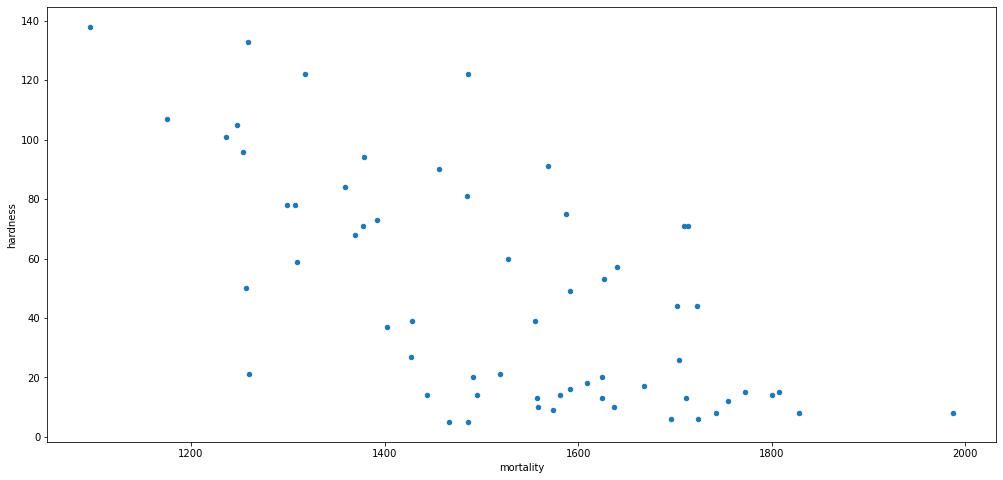

In [398]:
df[['mortality','hardness']].plot(kind = 'scatter', x = 'mortality', y = 'hardness')
#на вид связь есть, больше жесткость, меньше смертность

In [399]:
#Корреляция Пирсона
#отрицательная
df[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [400]:
#Корреляция Спирмена
#отрицательная
df[['mortality','hardness']].corr('spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [401]:
#Регрессия

X = df[['mortality']]
y = df['hardness']

#даных немного, на обучение - больше, на тест - меньше
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
model = LinearRegression()

#обучение по выборке
model.fit(X_train, y_train)

LinearRegression()

In [402]:
model.coef_

array([-0.13367979])

In [403]:
model.intercept_

247.913164541336

In [404]:
y_pred = model.predict(X_test)

In [405]:
#Детерминация
model.score(X_test, y_test)
#ну так себе, хотя мб из за небольшого числа тестовых данных

0.3728723578104972

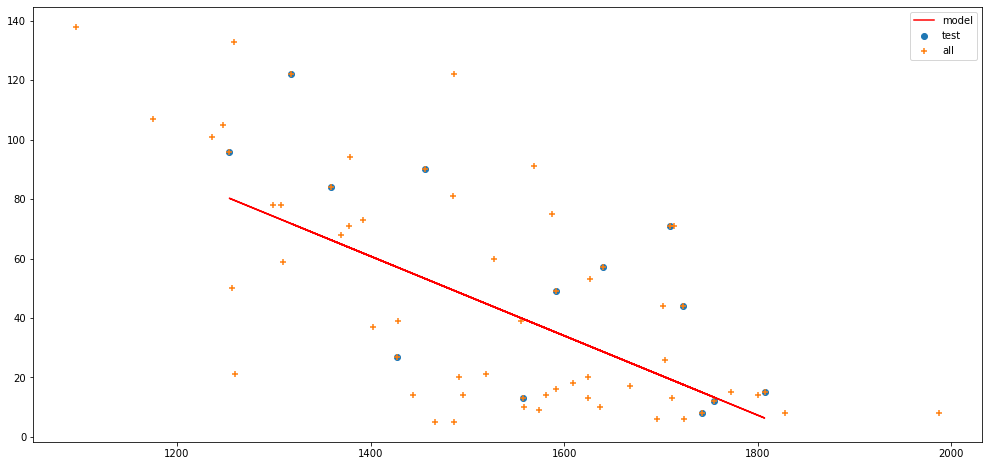

In [406]:
plt.scatter(X_test, y_test, label = 'test') #тестовые даннык
plt.plot(X_test, y_pred, c='r', label = 'model') #модель
plt.scatter(X, y, marker = '+', label = 'all') #все данные
plt.legend()

14.146809873627326

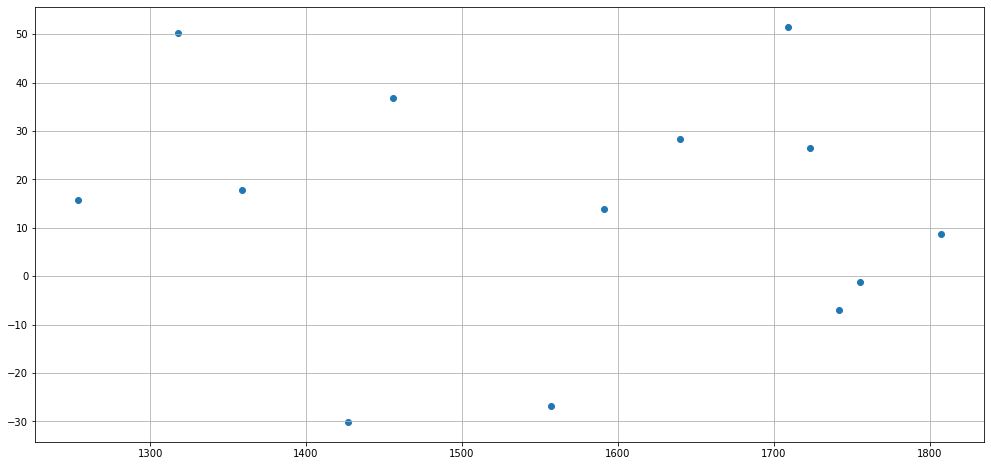

In [407]:
#остатки
remains = y_test-y_pred
plt.scatter(x = X_test, y = remains)
plt.grid()
remains.mean()
#около нуля, что хорошо


In [408]:
#Задание 2
#Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
#    Разделить данные на 2 группы
#    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [409]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [410]:
df['location'].value_counts()

#данных крайне мало

North    35
South    26
Name: location, dtype: int64

In [411]:
df_s = pd.DataFrame(df[df['location'] == 'South'])
df_s.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [412]:
df_n = pd.DataFrame(df[df['location'] == 'North'])
df_s.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


Пирсон            mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000 

Спирмен            mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


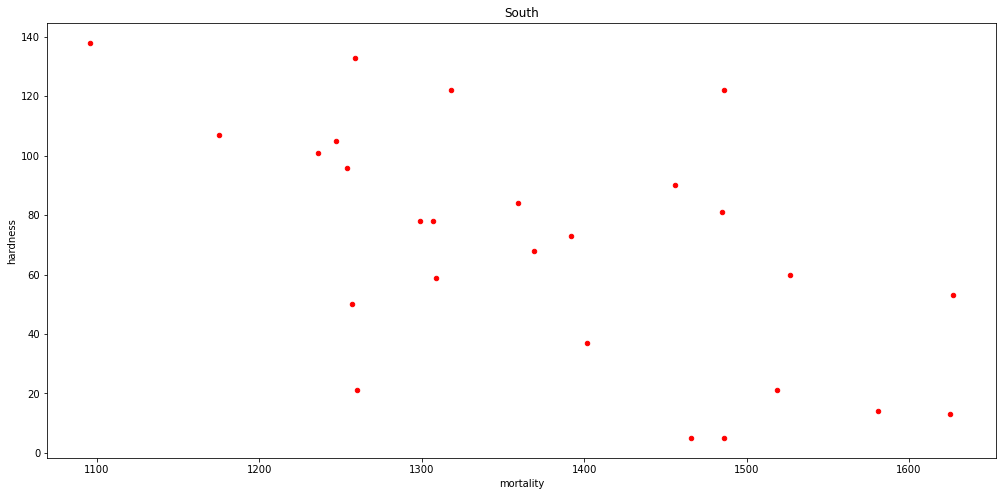

In [413]:
#Юг, scatter и корреляция
df_s[['mortality','hardness']].plot(kind = 'scatter', x = 'mortality', y = 'hardness', title = 'South', color = 'r')
print('Пирсон',df_s[['mortality','hardness']].corr(),'\n')
print('Спирмен',df_s[['mortality','hardness']].corr('spearman'))

#для южных связь стала слабее

Пирсон            mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000 

Спирмен            mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000


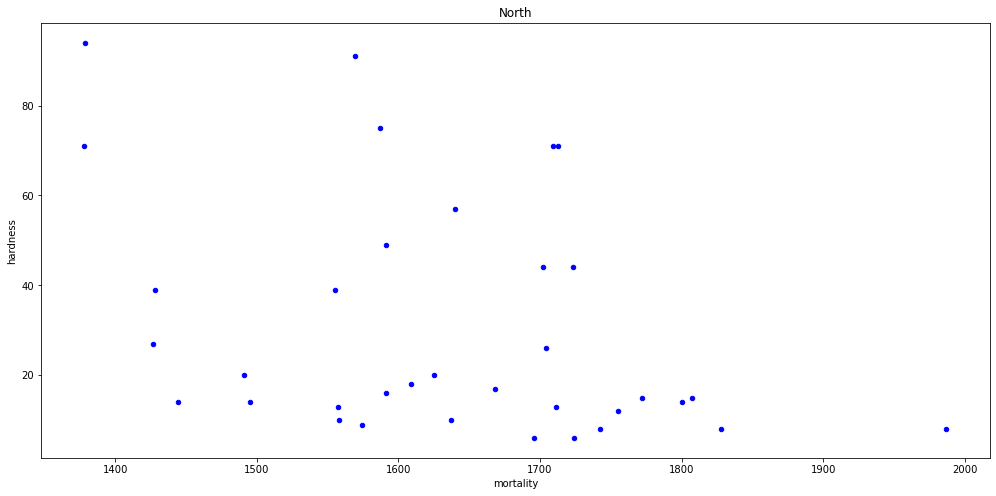

In [414]:
#Север, scatter и корреляция
df_n[['mortality','hardness']].plot(kind = 'scatter', x = 'mortality', y = 'hardness', title = 'North', color = 'b')
print('Пирсон',df_n[['mortality','hardness']].corr(),'\n')
print('Спирмен',df_n[['mortality','hardness']].corr('spearman'))
#для cеверных связь стала существенно слабее

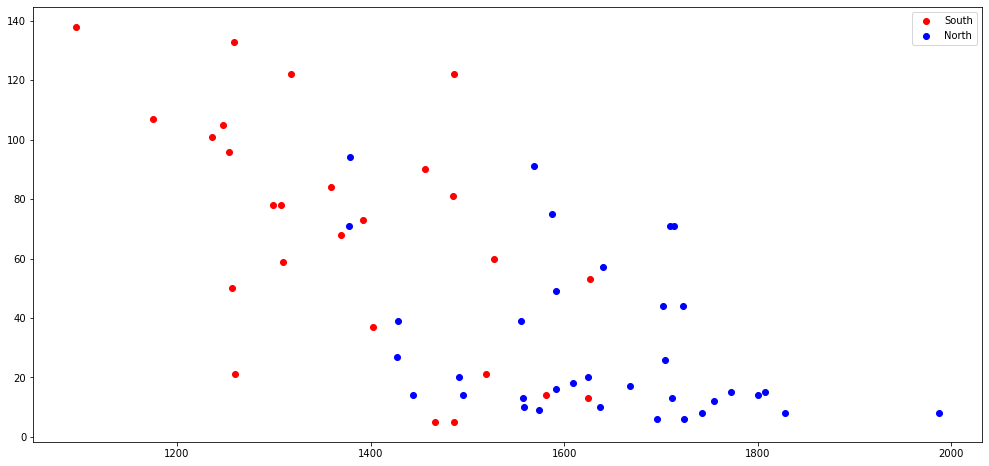

In [415]:
plt.scatter(x = df_s['mortality'],y = df_s['hardness'], color = 'r', label = 'South')
plt.scatter(x = df_n['mortality'],y = df_n['hardness'], color = 'b', label = 'North')
plt.legend()

#видно, что отделившись, юг стал немного вытянутым пятном, тогда как ранее он дополнял "хвост"
#север более вытянут, но все равно без данных от юга направленность менее выражена

### ЮГ

In [416]:
#Регрессия Юг

X = df_s[['mortality']]
y = df_s['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=27)
model_s = LinearRegression()

#обучение по выборке
model_s.fit(X_train, y_train)

#Прогнозные значения на основе тестовых
y_pred = model_s.predict(X_test)

In [417]:
#Коэффициент детерминации
model_s.score(X_test, y_test)
#стало хуже

0.2876917869558345

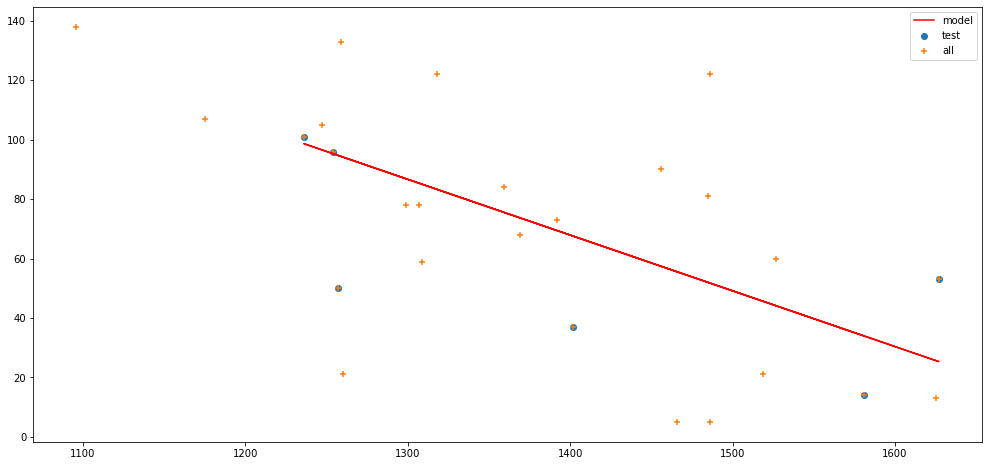

In [418]:
#Визуализация модели и данных
plt.scatter(X_test, y_test, label = 'test') #тестовые данные
plt.plot(X_test, y_pred, c='r', label = 'model') #модель
plt.scatter(X, y, marker = '+',label = 'all') #все данные
plt.legend()

-10.743178565356757

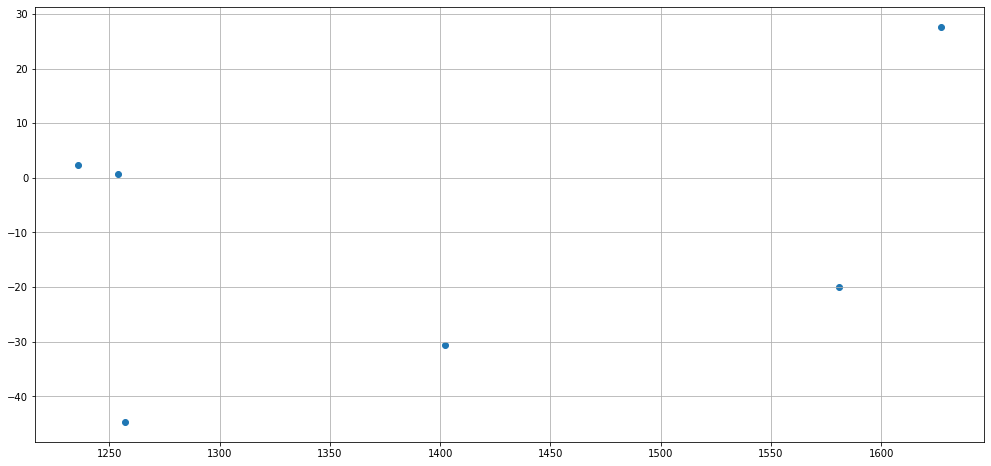

In [419]:
#Остатки
#остатки
remains = y_test-y_pred
plt.scatter(x = X_test, y = remains)
plt.grid()
remains.mean()


### СЕВЕР

In [420]:
#Регрессия Юг

X = df_n[['mortality']]
y = df_n['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=27)
model_n = LinearRegression()

#обучение по выборке
model_n.fit(X_train, y_train)

#Прогнозные значения на основе тестовых
y_pred = model_n.predict(X_test)

In [421]:
#Коэффициент детерминации
model_n.score(X_test, y_test)
#стало хуже

0.290467090969028

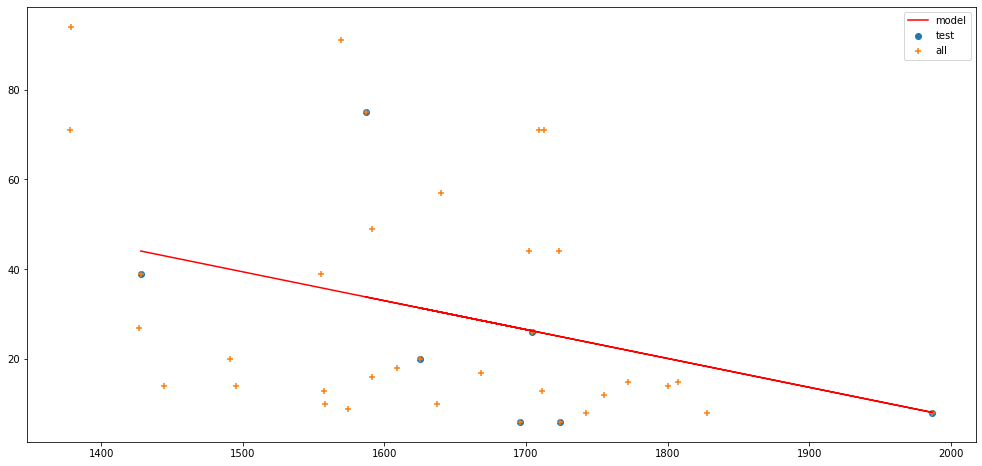

In [422]:
#Визуализация модели и данных
plt.scatter(X_test, y_test, label = 'test') #тестовые даннык
plt.plot(X_test, y_pred, c='r', label = 'model') #модель
plt.scatter(X, y, marker = '+', label = 'all') #все данные
plt.legend()

-2.2322612198309804

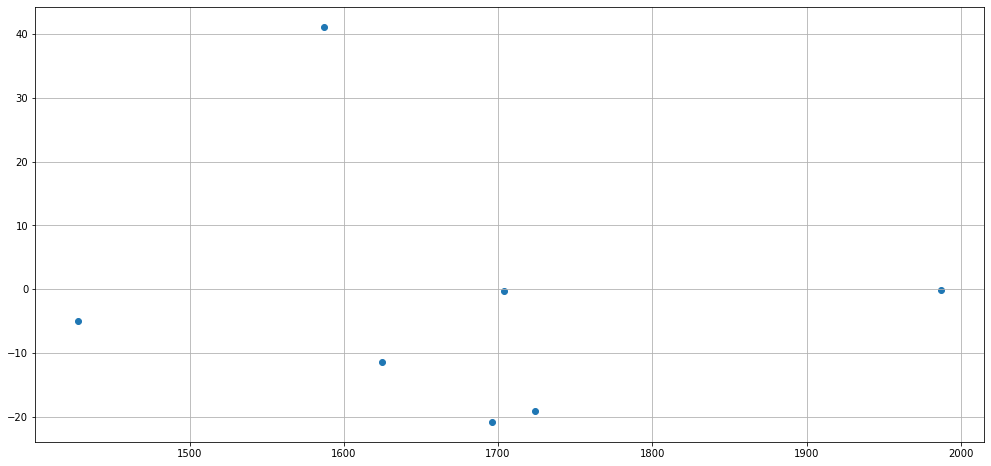

In [423]:
#Остатки
#остатки
remains = y_test-y_pred
plt.scatter(x = X_test, y = remains)
plt.grid()
remains.mean()


In [ ]:
#Для каждого региона в отдельности тенденция сохраняется, но из-за недостатка данных, сказать с уверенностью нельзя